Collatz binary mechanics

In [21]:
"""
This notebook analyses the binary mechanics of Collatz sequences.
"""

# Imports
from math import log2
import random as rnd
import matplotlib.pyplot as plt
import pandas as pd
from collatz import commons


# Helper methods
def _odd_collatz_components(odd_number:int, k=3):
    """
    This method returns the following components of an odd Collatz 
    number and a particular k factor:
    1.) vi: The odd number
    2.) kvi: The odd number multiplied with k
    3.) kvi+1: The value vi_k + 1
    4.) vi_1: The next odd number
    :param odd_number: The odd number as int
    :param k: The k factor, default is three
    :return: The components as dict
    """
    vi = odd_number
    k_vi = k * odd_number
    k_vi_1 = k_vi + 1
    vi_1 = k_vi_1 / 2**commons.trailing_zeros(k_vi_1)
    result_dict = {
        "vi": vi,
        "kvi": k_vi,
        "kvi+1": k_vi_1,
        "vi_1": vi_1
    }
    return result_dict


def _odd_collatz_sequence_components(
        start_value:int, k=3, max_iterations=100):
    """
    This method returns the components of a specific Collatz sequence as generated by 
    the method _odd_collatz_components.
    :param start_value: The odd number to start with. The value must be a
    natural number > 0. If an even number is handed over, the next odd number will be used
    as start value.
    :param k: The factor that is multiplied with odd numbers (default is 3).
    :param max_iterations: The maximum number of iterations performed
    before the method exits. Default is -1, meaning that no max number of iterations is set.
    :return: A pandas data frame with the Collatz components.
    """
    result_frame = None
    odd_sequence = commons.odd_collatz_sequence(
        start_value, k, max_iterations)
    
    for i, odd in enumerate(odd_sequence):
        components = _odd_collatz_components(odd, k)
        del components["vi_1"]
        
        current_frame = pd.DataFrame({
            "n": i + 1,
            "variable": list(components.keys()),
            "decimal": list(components.values())
        })
        if result_frame is not None:
            result_frame = result_frame.append(current_frame)
        else:
            result_frame = current_frame
            
    result_frame["decimal"] = result_frame["decimal"].astype('int64')
    result_frame = result_frame.reset_index(drop=True)
    return result_frame


# Configuration
MAX_VALUE = 101
K_FACTOR = 3
MAX_ITERATIONS = 50
LOG_MODE = None
PRINT_TABLE = True

START_VALUE = rnd.randint(1, MAX_VALUE)

if START_VALUE % 2 == 0:
    START_VALUE = START_VALUE + 1

# START_VALUE = 31

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Create a collatz components
analysis_frame = _odd_collatz_sequence_components(
    START_VALUE, K_FACTOR, MAX_ITERATIONS)

# Derive new fields
analysis_frame["alpha"] = analysis_frame["decimal"].apply(commons.trailing_zeros)
analysis_frame["alpha"] = analysis_frame["alpha"].astype('int64')
analysis_frame["alpha_sum"] = analysis_frame["alpha"].cumsum()

analysis_frame["log2"] = analysis_frame["decimal"].apply(log2)
analysis_frame["bin_str"] = analysis_frame["decimal"].apply(commons.to_binary)
analysis_frame["bin_len"] = analysis_frame["log2"].astype('int64') + 1
analysis_frame["bin_growth_hyp"] = (analysis_frame["n"] * log2(K_FACTOR))
analysis_frame["bin_growth_max"] = analysis_frame["bin_growth_hyp"].astype('int64') + 1

prev_bin_len = list(analysis_frame[:-1]["bin_len"])
prev_bin_len.insert(0, prev_bin_len[0])
analysis_frame["bin_diff"] = analysis_frame["bin_len"] - pd.Series(prev_bin_len)

analysis_frame["bin_growth_act"] = analysis_frame["bin_diff"]
analysis_frame.loc[analysis_frame["bin_growth_act"] < 0, "bin_growth_act"] = 0
analysis_frame["bin_growth_act"] = analysis_frame["bin_growth_act"].cumsum()

next_decimal = list(analysis_frame[1:]["decimal"])
next_decimal.append(0)
analysis_frame["next_decimal"] = next_decimal

# Remove components of the final result
analysis_frame = analysis_frame[:-3]

# Print results
print_frame = analysis_frame[[
    "n", "variable", "decimal", "next_decimal",
    "log2", "bin_str", "bin_len", "bin_growth_max",
    "bin_growth_act", "alpha_sum"
]]

print_frame.columns = [
    "n","var", "dec", "next", 
    "log2", "b_str", "b_len", "b_g_max",
    "b_g_act", "a_sum"
]

print("Start value:", START_VALUE, 
      " K:", K_FACTOR, 
      "\n")

if PRINT_TABLE:
    print(print_frame.to_string(), "\n")

Start value: 87  K: 3 

    n    var  dec  next      log2       b_str  b_len  b_g_max  b_g_act  a_sum
0   1     vi   87   261  6.442943     1010111      7        2        0      0
1   1    kvi  261   262  8.027906   100000101      9        2        2      0
2   1  kvi+1  262   131  8.033423   100000110      9        2        2      1
3   2     vi  131   393  7.033423    10000011      8        4        2      1
4   2    kvi  393   394  8.618386   110001001      9        4        3      1
5   2  kvi+1  394   197  8.622052   110001010      9        4        3      2
6   3     vi  197   591  7.622052    11000101      8        5        3      2
7   3    kvi  591   592  9.207014  1001001111     10        5        5      2
8   3  kvi+1  592    37  9.209453  1001010000     10        5        5      6
9   4     vi   37   111  5.209453      100101      6        7        5      6
10  4    kvi  111   112  6.794416     1101111      7        7        6      6
11  4  kvi+1  112     7  6.807355     11

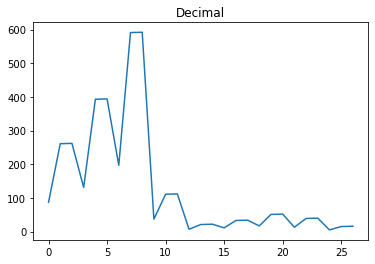

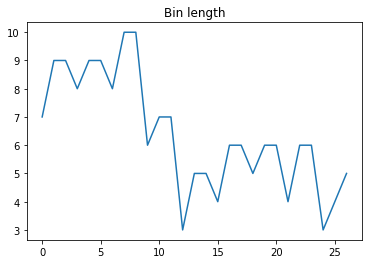

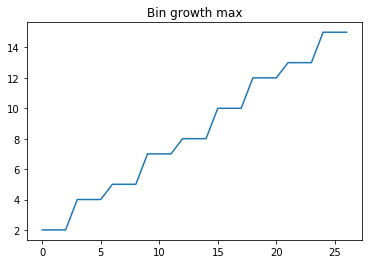

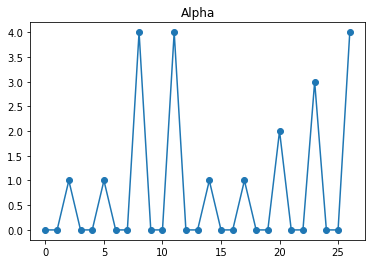

In [22]:
#Plot results
# Decimal
plt.figure()
plt.title("Decimal")
plt.plot(analysis_frame["decimal"], "-")

# Bin len
plt.figure()
plt.title("Bin length")
plt.plot(analysis_frame["bin_len"], "-")

plt.figure()
plt.title("Bin growth max")
plt.plot(analysis_frame["bin_growth_max"], "-")

plt.figure()
plt.title("Alpha")
plt.plot(analysis_frame["alpha"], "-o")

plt.show()